# Preprocessing 5 – Color Space Conversion & Channel Analysis

## Import dependacies

In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Setup Paths and Color Spaces

Define dataset paths and color space conversions.

In [2]:
dataset_dir = "../data/raw"

output_dir = "../results/outputs/5"
os.makedirs(output_dir, exist_ok=True)

eda_dir = "../results/eda_visualizations"
os.makedirs(eda_dir, exist_ok=True)

color_spaces = {
    "HSV": cv2.COLOR_BGR2HSV,
    "LAB": cv2.COLOR_BGR2LAB,
    "YUV": cv2.COLOR_BGR2YUV
}

## Process Images

- Loop through each disease category
- Convert a sample image set to HSV, LAB, YUV
- Extract channels
- Compute mean and std for later analysis

In [3]:
results = []

sample_size = 20  # number of images per disease to process

for disease in os.listdir(dataset_dir):
    in_path = os.path.join(dataset_dir, disease)
    if not os.path.isdir(in_path): continue
        
    out_path = os.path.join(output_dir, disease)
    os.makedirs(out_path, exist_ok=True)
    
    files = [f for f in os.listdir(in_path) if f.lower().endswith(".jpg")]
    random.shuffle(files)
    files = files[:sample_size]  # pick subset
    
    for fname in files:
        img = cv2.imread(os.path.join(in_path, fname))
        if img is None: continue
        
        for space_name, cv_code in color_spaces.items():
            converted = cv2.cvtColor(img, cv_code)
            for ch in range(3):
                channel = converted[:,:,ch]
                mean_val, std_val = np.mean(channel), np.std(channel)
                results.append([disease, space_name, f"Ch{ch}", mean_val, std_val])
                
                # Save channel image for inspection
                base = os.path.splitext(fname)[0]
                cv2.imwrite(os.path.join(out_path, f"{base}_{space_name}_ch{ch}.jpg"), channel)


## Create DataFrame of Channel Statistics

Store computed means and standard deviations for visualization.

In [4]:
df = pd.DataFrame(results, columns=["Disease","ColorSpace","Channel","Mean","Std"])

df

,Disease,ColorSpace,Channel,Mean,Std
0,brown_blight,HSV,Ch0,117.613342,29.501418
1,brown_blight,HSV,Ch1,43.726837,22.655093
2,brown_blight,HSV,Ch2,218.659805,72.479413
3,brown_blight,LAB,Ch0,195.330429,63.199490
4,brown_blight,LAB,Ch1,136.189819,6.996185
...,...,...,...,...,...
1075,helopeltis,LAB,Ch1,121.619186,9.775594
1076,helopeltis,LAB,Ch2,138.061523,13.054262
1077,helopeltis,YUV,Ch0,196.854889,78.356226
1078,helopeltis,YUV,Ch1,120.463135,9.720071


## Visualization

### Bar Plot of Channel Means

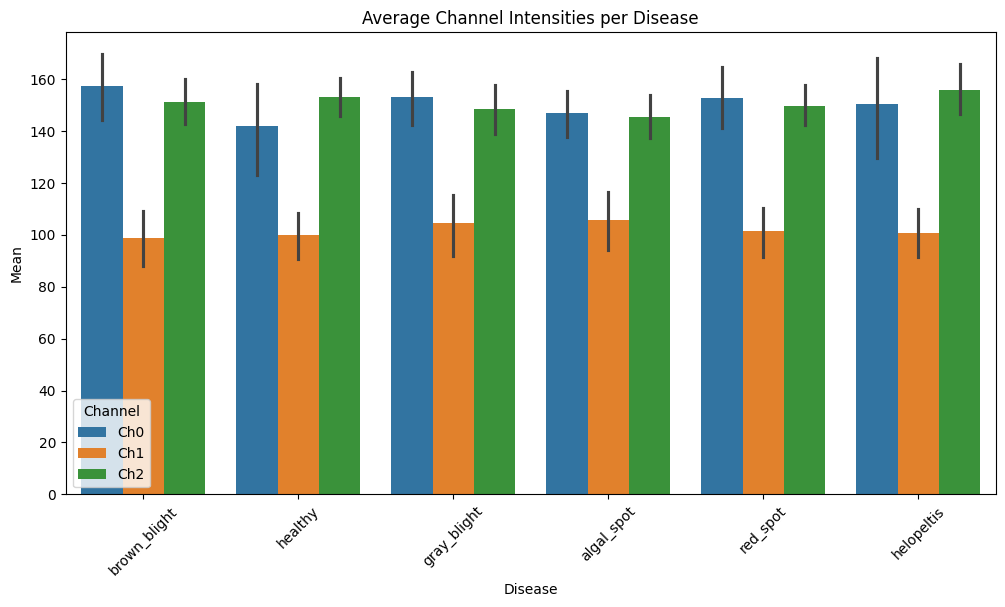

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Disease", y="Mean", hue="Channel")
plt.title("Average Channel Intensities per Disease")
plt.xticks(rotation=45)

plt.show()

out_file = f"avg_channel_intensities.png"
plt.savefig(os.path.join(eda_dir, out_file), dpi=300, bbox_inches="tight")

### Boxplots for Efficiency All Color Spaces

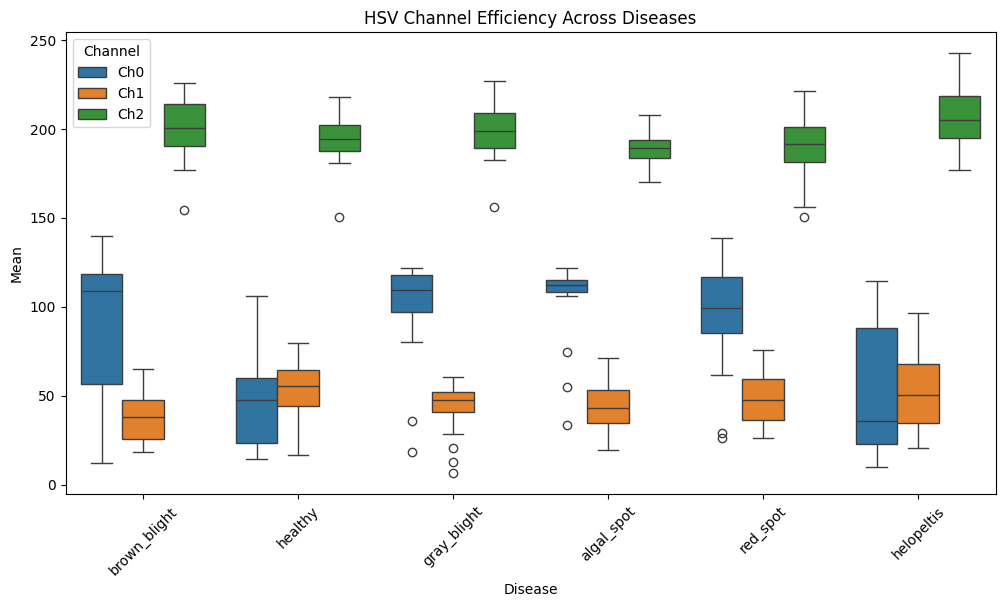

<Figure size 640x480 with 0 Axes>

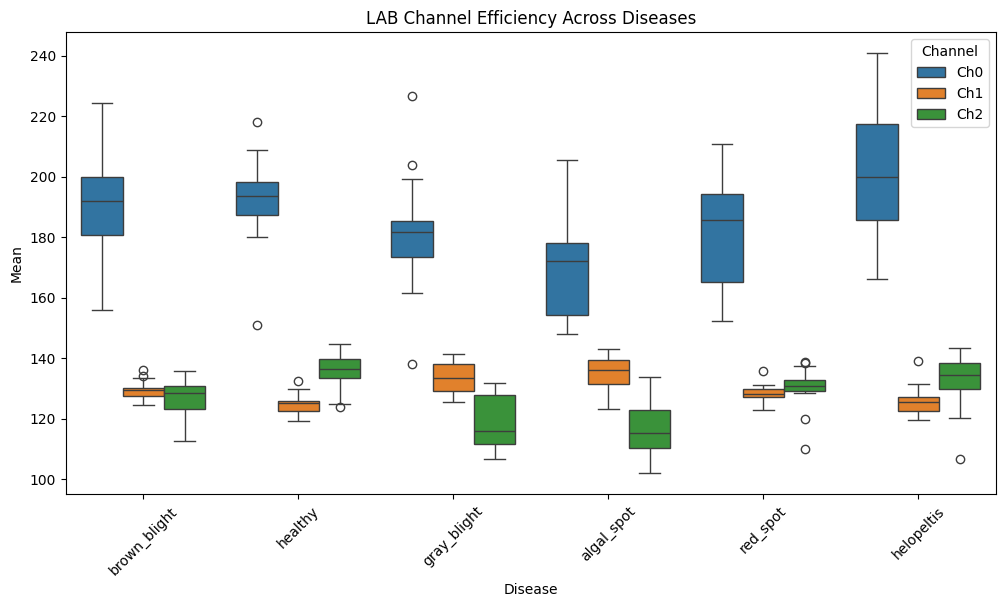

<Figure size 640x480 with 0 Axes>

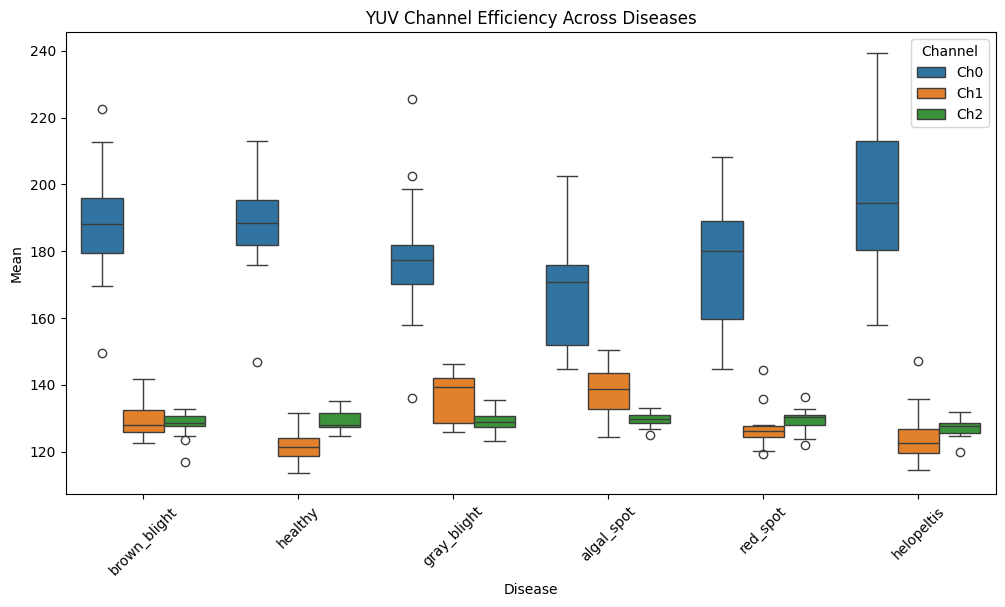

<Figure size 640x480 with 0 Axes>

In [6]:
for space in df["ColorSpace"].unique():
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=df[df["ColorSpace"] == space],
        x="Disease", y="Mean", hue="Channel"
    )
    plt.title(f"{space} Channel Efficiency Across Diseases")
    plt.xticks(rotation=45)
    plt.show()

    out_file = f"{space}_channel_efficiency.png"
    plt.savefig(os.path.join(eda_dir, out_file), dpi=300, bbox_inches="tight")

### Histograms of Channel Means

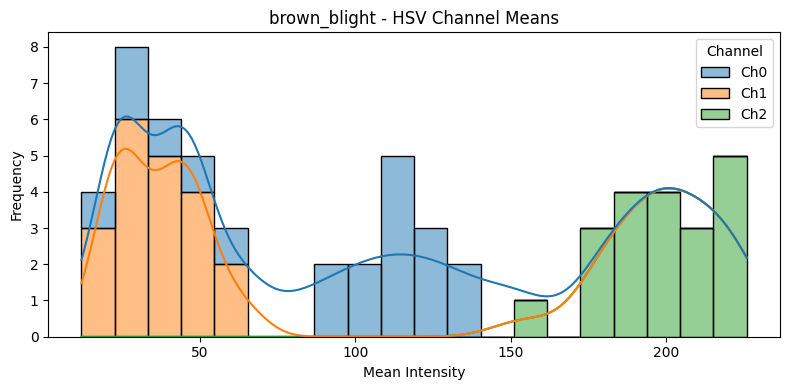

<Figure size 640x480 with 0 Axes>

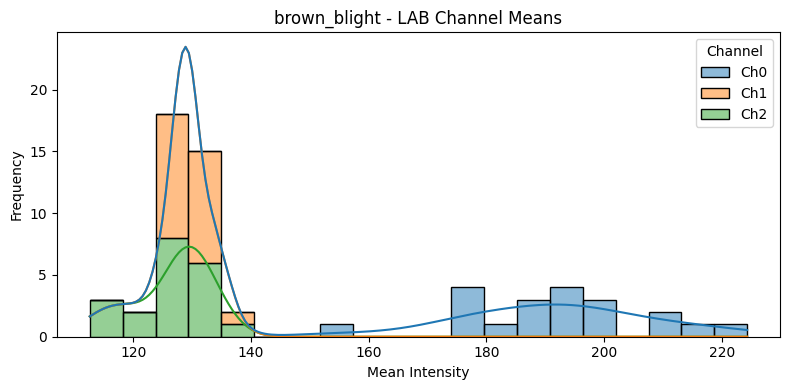

<Figure size 640x480 with 0 Axes>

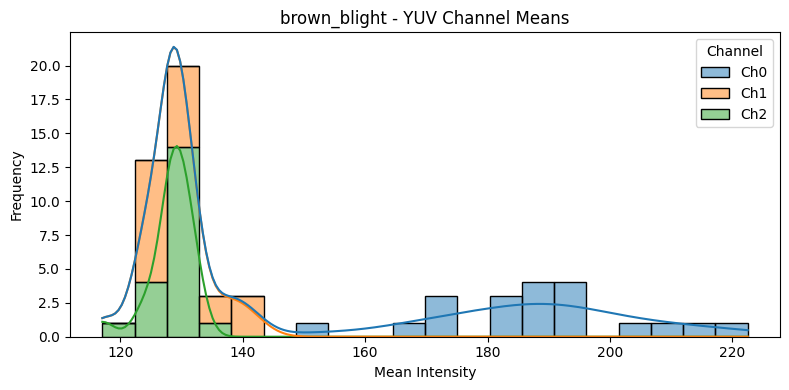

<Figure size 640x480 with 0 Axes>

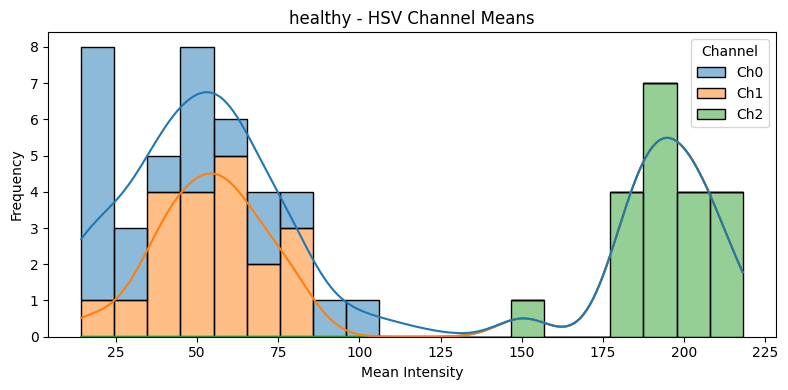

<Figure size 640x480 with 0 Axes>

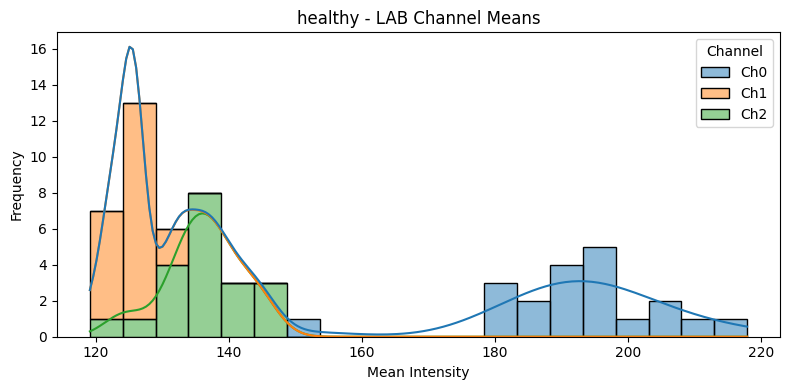

<Figure size 640x480 with 0 Axes>

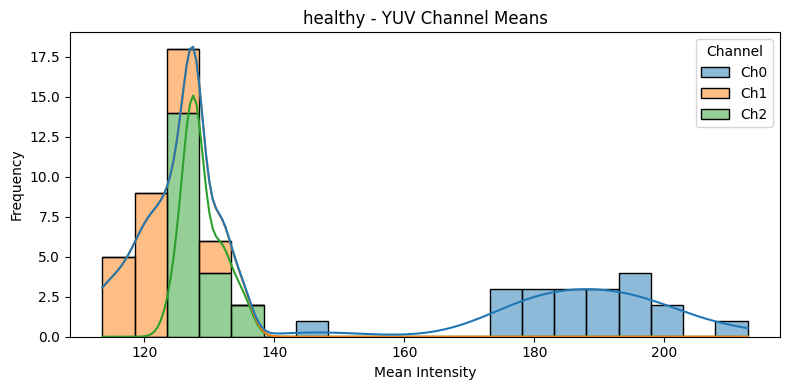

<Figure size 640x480 with 0 Axes>

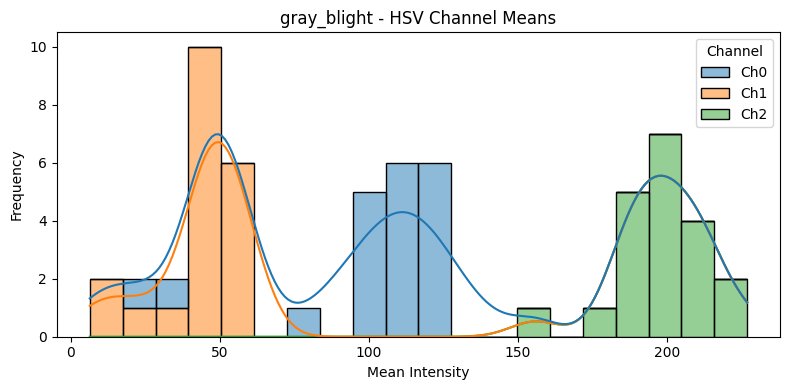

<Figure size 640x480 with 0 Axes>

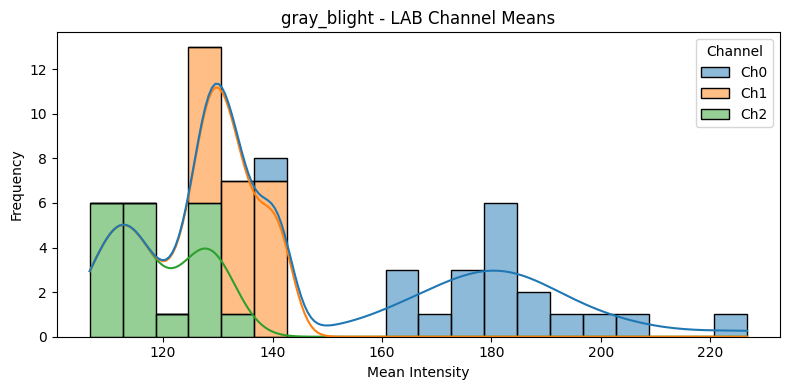

<Figure size 640x480 with 0 Axes>

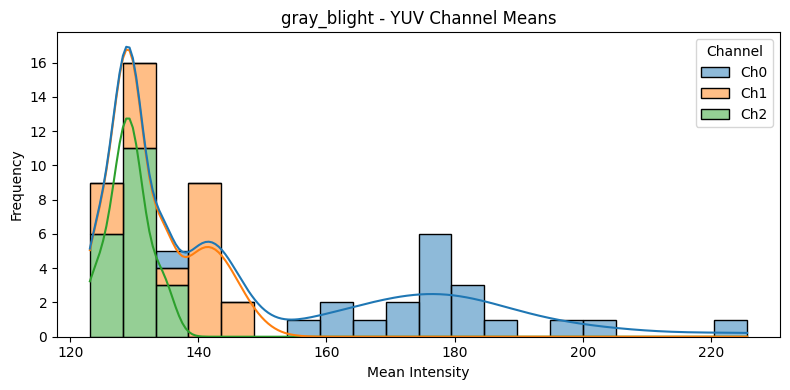

<Figure size 640x480 with 0 Axes>

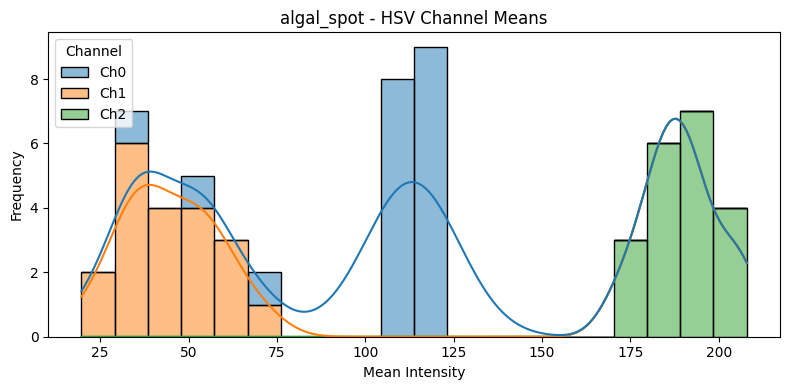

<Figure size 640x480 with 0 Axes>

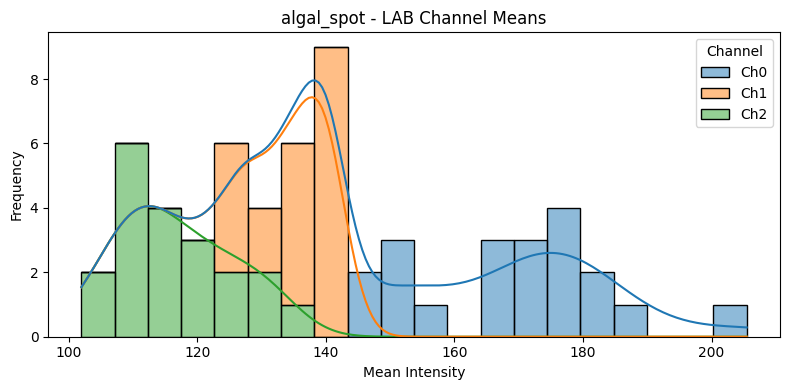

<Figure size 640x480 with 0 Axes>

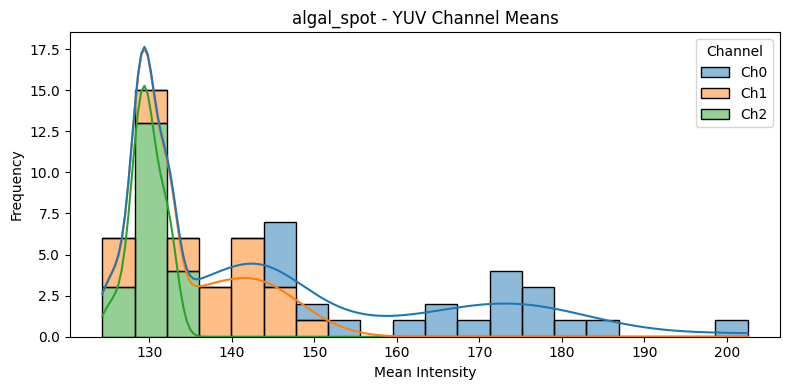

<Figure size 640x480 with 0 Axes>

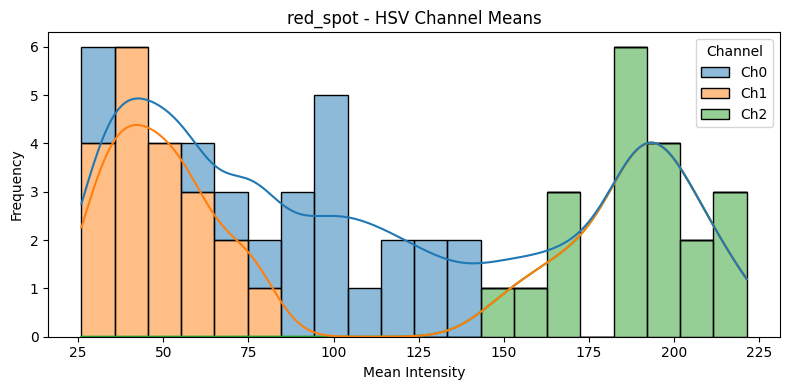

<Figure size 640x480 with 0 Axes>

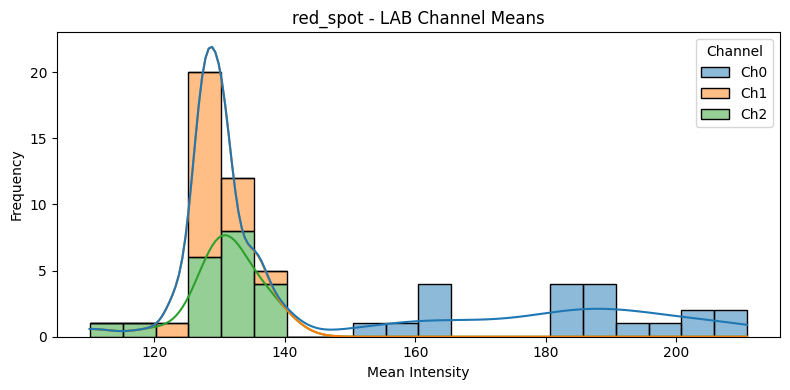

<Figure size 640x480 with 0 Axes>

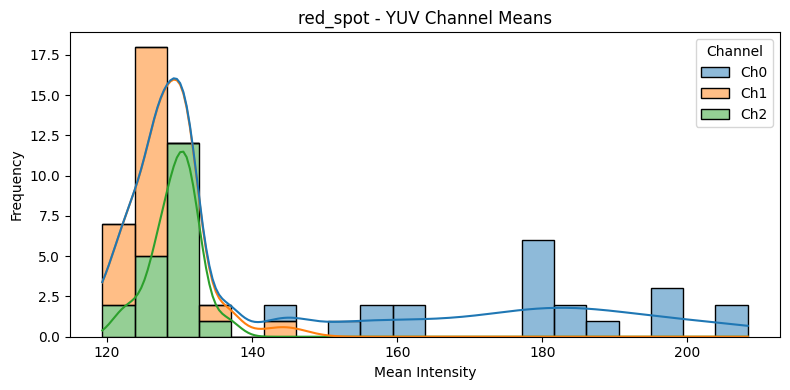

<Figure size 640x480 with 0 Axes>

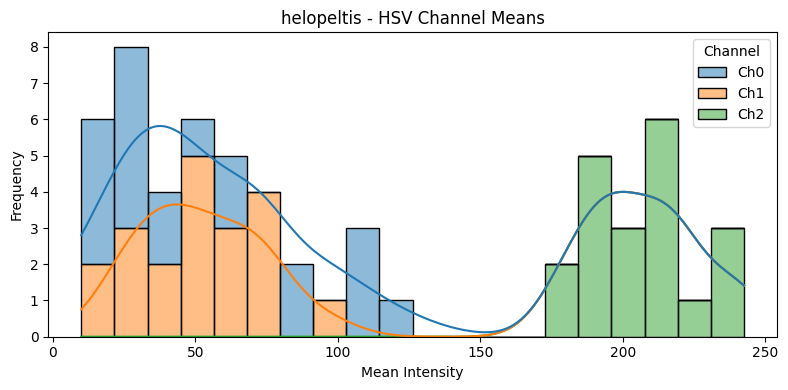

<Figure size 640x480 with 0 Axes>

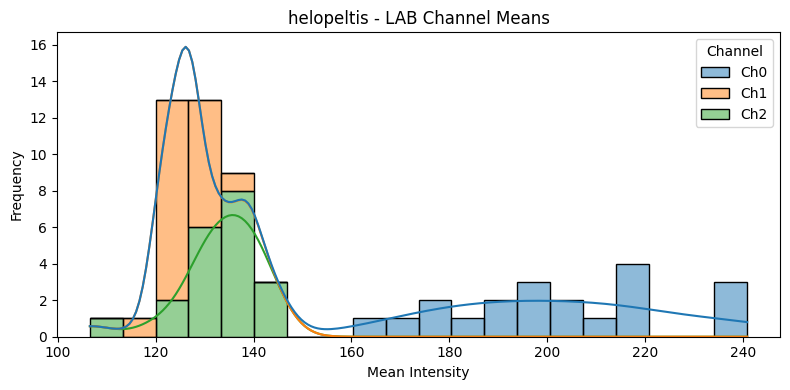

<Figure size 640x480 with 0 Axes>

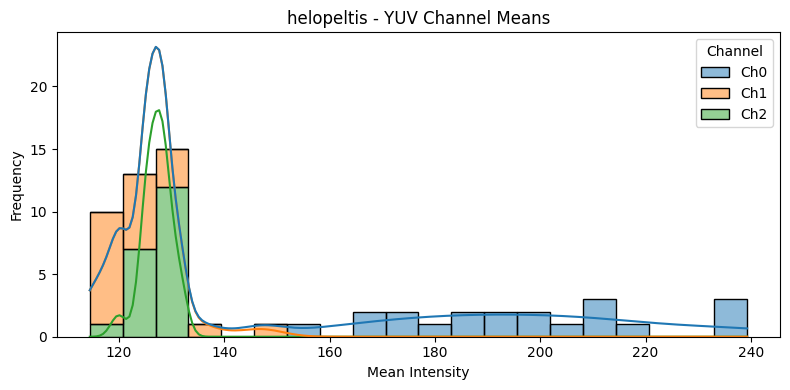

<Figure size 640x480 with 0 Axes>

In [7]:
for disease in df["Disease"].unique():
    for space in df["ColorSpace"].unique():
        subset = df[(df["Disease"] == disease) & (df["ColorSpace"] == space)]
        if subset.empty:
            continue

        plt.figure(figsize=(8, 4))
        sns.histplot(data=subset, x="Mean", bins=20, kde=True, hue="Channel", multiple="stack")
        plt.title(f"{disease} - {space} Channel Means")
        plt.xlabel("Mean Intensity")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        out_file = f"{disease}_{space}_channel_means.png"
        plt.savefig(os.path.join(eda_dir, out_file), dpi=300, bbox_inches="tight")